# Declaration of Originality

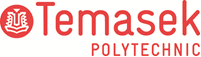

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* <bl>Student Name (Matric Number) </bl> : Cai Jiale (2403847C)
* Tutorial Group                : PC01
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding

**1.Problem Background & Motivation:** 

The real estate market in Ames, Iowa, faces a lack of accessible, data-driven tools to help users make confident pricing decisions. Buyers often risk overpaying due to emotional bidding or misinformation. Sellers may undervalue their properties or face long listing times due to unrealistic pricing. Real estate agents need fast, consistent estimations to serve clients efficiently. Meanwhile, market participants, including investors, lack transparency into the key factors that affect property prices.


**2.Goal:** 
- Provide a streamlined, accurate price prediction tool that makes housing price insights more accessible to non-technical users.
- Enable interactive feature selection and simulation, so users can explore how different property characteristics (e.g., area, quality, basement size) influence the final price.
- Improve pricing strategy accuracy for sellers and agents to reduce time-on-market and negotiation disputes.
- Empower buyers to make better-informed investment decisions or first-home purchases based on predicted price fairness.

**3.Stakeholders:**
- Home buyers (mainstream users)
- Real estate agents (consultative users)
- Sellers & investors (financial decision-makers)
- Market analysts & urban planners (secondary/extended users)

**4.Business Success Criteria：**
- Users can predict house prices with <15% deviation from actual market sale prices.
- Stakeholders use the tool to validate or adjust pricing decisions in at least 80% of test scenarios.
- Streamlit app receives positive user feedback on clarity, usefulness, and relevance during UAT (User Acceptance Testing).
- The model ranks key influencing factors clearly (e.g., quality, size), supporting educational and business communication purposes.

**5.Constraints and Considerations**
- Model needs to work with limited features during deployment (not all users know MSSubClass or GarageFinish).
- Predictions should remain interpretable, avoiding black-box overfitting, especially for educational or advisory use.
- Deployment limitations: The Streamlit app must remain lightweight, responsive, and accessible on most devices.
- The primary goal of this project is to accurately predict house sale prices in Ames, Iowa, using a real-world dataset of property characteristics. This model is implemented into a user-friendly Streamlit web app, where stakeholders can interactively filter features (e.g., house size, neighborhood, garage type) and instantly receive a price prediction. This allows:

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
# Load train and test data
FILEPATH = pd.read_csv("train.csv")
df = FILEPATH
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

I used df.info() to quickly understand the overall structure of the dataset, including the number of entries (rows), number of features (columns), data types, and presence of missing values.

From the output, I observed that the dataset contains 1460 rows and 81 features. Some features, like ‘Alley’, have a large number of missing values (only 91 non-null entries), which means I may need to either fill or drop them depending on their importance.

Understanding the data types helps me decide how to handle each feature properly — for instance, I know that object-type features are likely to be categorical and may require encoding (like One-Hot Encoding) before modeling.

This step also helps me plan my data preprocessing, such as handling missing values, deciding which columns to transform, and choosing the right type of visualizations (e.g., bar chart for categorical features, histograms for numerical ones).

In short, df.info() gives me a foundation to clean and prepare my data effectively, and ensures I don’t go into modeling blindly without knowing the shape and quality of my data.

In [4]:
## Describe data distribution
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


I used the method df.describe(include='all') to conduct a comprehensive descriptive statistical analysis of the dataset. This method can provide summary statistics for numerical variables, frequency-related information for categorical variables, and is helpful in identifying distribution patterns, skewness, outliers, missing values, and variable types. The analysis results provided guidance for subsequent preprocessing decisions, including feature encoding, transformation, and feature selection operations. 

For instance, LotArea (land parcel area) shows a wide range and a high standard deviation, indicating an extremely uneven distribution with extreme outliers. To better understand its impact, we used visualization tools such as histograms and box plots, and considered transformation methods such as logarithmic scaling or outlier handling to reduce potential model bias. In contrast, Street (street type) has only two categories, with "Pave" (paved) dominating, suggesting a very low information gain and limited contribution to the predictive performance. Similarly, the bar chart analysis of categorical features such as MSZoning (zone classification) also confirmed that most properties are located in the RL (low-density residential) area, indicating that this dataset mainly represents mainstream low-density residential houses.

      Column  Missing_Count
      PoolQC           1453
 MiscFeature           1406
       Alley           1369
       Fence           1179
  MasVnrType            872
 FireplaceQu            690
 LotFrontage            259
  GarageType             81
 GarageYrBlt             81
GarageFinish             81
  GarageQual             81
  GarageCond             81
BsmtFinType2             38
BsmtExposure             38
BsmtFinType1             37
    BsmtCond             37
    BsmtQual             37
  MasVnrArea              8
  Electrical              1


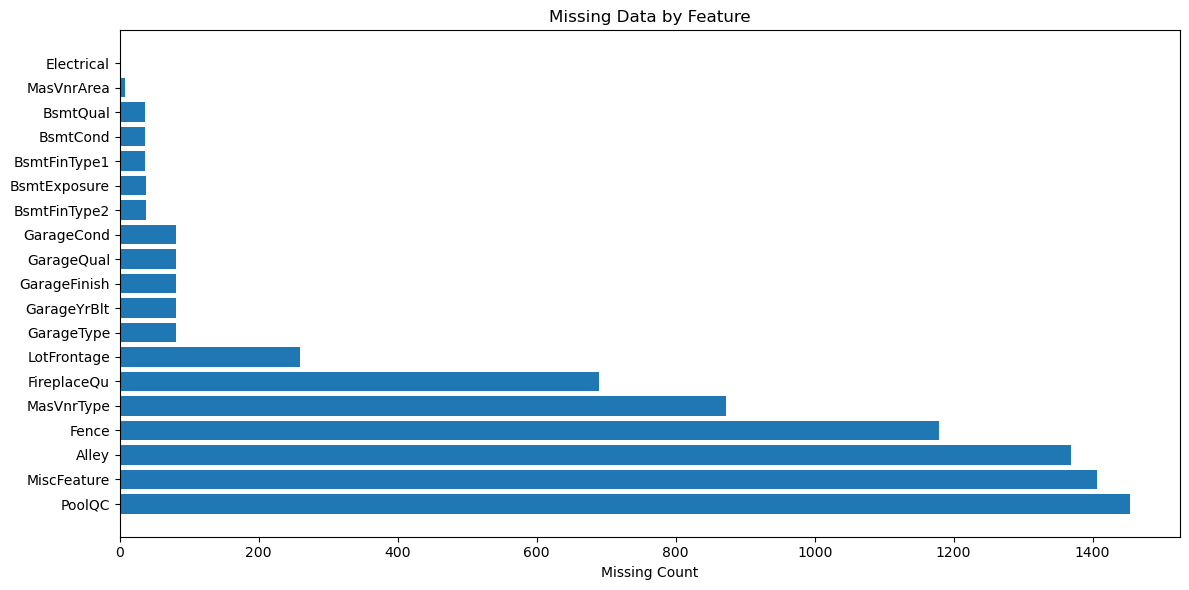

In [5]:
# Check for missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum()
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(missing_data['Column'], missing_data['Missing_Count'])
plt.xlabel('Missing Count')
plt.title('Missing Data by Feature')
plt.tight_layout()
plt.show()

In [6]:
# Feature types which are numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#I excluded the Id column (which is just an identifier) and SalePrice (target variable) from the feature list to avoid data leakage.
numerical_features = [f for f in num_cols if f not in ['Id', 'SalePrice']]

feature_df = pd.DataFrame({
    'Numerical Features': pd.Series(numerical_features),
    'Categorical Features': pd.Series(cat_cols)
})

feature_df

,Numerical Features,Categorical Features
0,MSSubClass,MSZoning
1,LotFrontage,Street
2,LotArea,Alley
3,OverallQual,LotShape
4,OverallCond,LandContour
5,YearBuilt,Utilities
6,YearRemodAdd,LotConfig
7,MasVnrArea,LandSlope
8,BsmtFinSF1,Neighborhood
9,BsmtFinSF2,Condition1


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

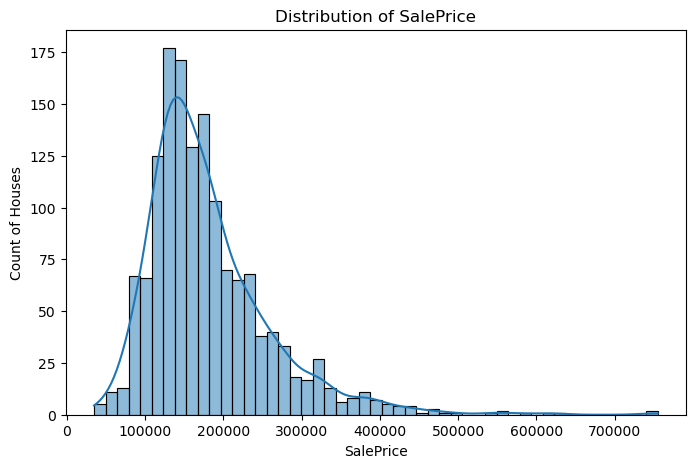

In [7]:
## Understanding distribution of target
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count of Houses")
plt.show()

Text(0.5, 1.0, 'Box Plot of SalePrice')

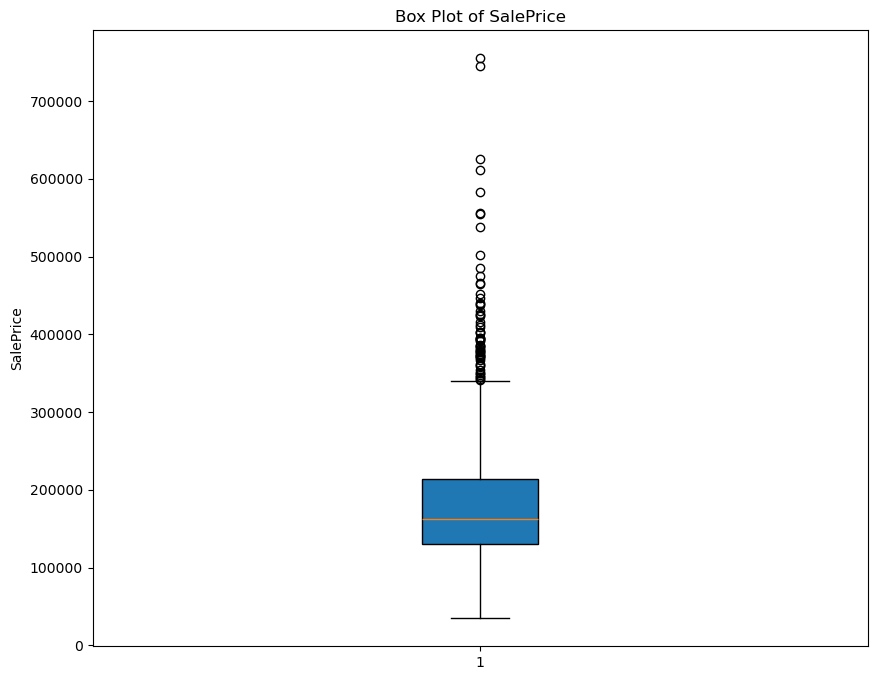

In [8]:
target_col = 'SalePrice' 

fig, axes = plt.subplots(figsize=(10, 8))
axes.boxplot(df[target_col], vert=True, patch_artist=True)
axes.set_ylabel(target_col)
axes.set_title(f'Box Plot of SalePrice')

1. **mean=$180,921.20 VS median=$163,000**
    - The fact that the mean is significantly higher than the median confirms the distribution’s positive skewness (right-skewed).
    - This skew is primarily caused by a small number of extremely expensive homes—luxury properties or custom-built estates—pulling the average upward.
    - Example: In a neighborhood of 10 homes, if 9 are priced around $150,000 and 1 is $750,000, the average becomes distorted, even though the majority remain mid-priced.

2. **Mode ≈ $150,000 (from histogram peak)**
    - The most frequent house price lies closer to $150k, showing that most buyers transact in this mid-range bracket, well below the mean.

3. **std：79,442.50**
    - A high standard deviation (~44% of the mean) indicates wide variability in home prices, further validating a heterogeneous market.
    - Homes priced above $214k form the upper quartile, possibly representing upgrade purchases, “dream homes,” or higher-end segments.

4. **$IQR = Q3 - Q1 = \$84,025$**
    - This means that the most crucial 50% of the transactions in Ames City are concentrated within the range of $130,000 to $214,000. 
    - This range captures the middle 50% of home prices, meaning most typical transactions lie between $130k and $214k.
    - The dividing line between new construction and improvement: Houses priced above $214,000 account for only 25%, which can be defined as the "improved" or "high-end" housing market in this city.

- The **SalePrice target** contains 1460 valid entries with no missing values. This ensures that the observed distribution is indeed **right-skewed (Positive Skew)** rather than distorted due to incomplete data.

- The prices of most of the houses in the picture are concentrated in the range of $100k - $200k, which indicates that the residents in Ames predominantly middle-income households. Therefore, the As a result, property developers tend to focus on constructing mid-to-loe-priced residences that cater to the mainstream population, as this price range is generally sufficient to meet the basic housing needs of most families. And, only small group of wealthy individuals can afford high-end properties. 

- This pattern can also be explained by the urban and economic context of the dataset. The data originates from Ames, Iowa, a medium-sized city where demand for high-end or luxury housing is naturally limited. Most households in the city belong to the middle-income bracket, which results in a relatively narrow market for expensive properties. Furthermore, the dataset primarily consists of typical residential homes, with fewer investment-oriented or luxury properties included, reinforcing the dense clustering in the affordable price range.

- At 2010 (when the dataset is collected), Amesn may possess a large amount of undeveloped plain land as only when the land supply is abundant will developers build a large number of mid-to-low priced detached houses. if the land is scarce, the price distribution will shift to the right as a whole, and the median will be closer to the mean.

- The existence of the minimum value of $34,900$ implies a clear age gap in the housing market. Such extremely low prices are usually not "cheap houses", but rather "houses in need of renovation" or "dilapidated houses with only land value". This reflects that Ames, as a mature city, has a considerable proportion of old communities, which contrasts sharply with the newly developed high-priced areas (Outliers).

- Outliers don’t invalidate the model, but highlight the need for careful preprocessing and possibly segmented modeling if luxury pricing is analyzed separately. The fact that no lower outliers exist (very few below $35k) suggests no data entry errors on the lower end. The min value of $34,900 likely represents dilapidated properties, houses sold primarily for land, or aging structures requiring full renovation. This may show that Ames likely includes older neighborhoods or aging communities, consistent with its identity as a mature Midwestern city.

### 2.3.1.2 Understanding distribution of features

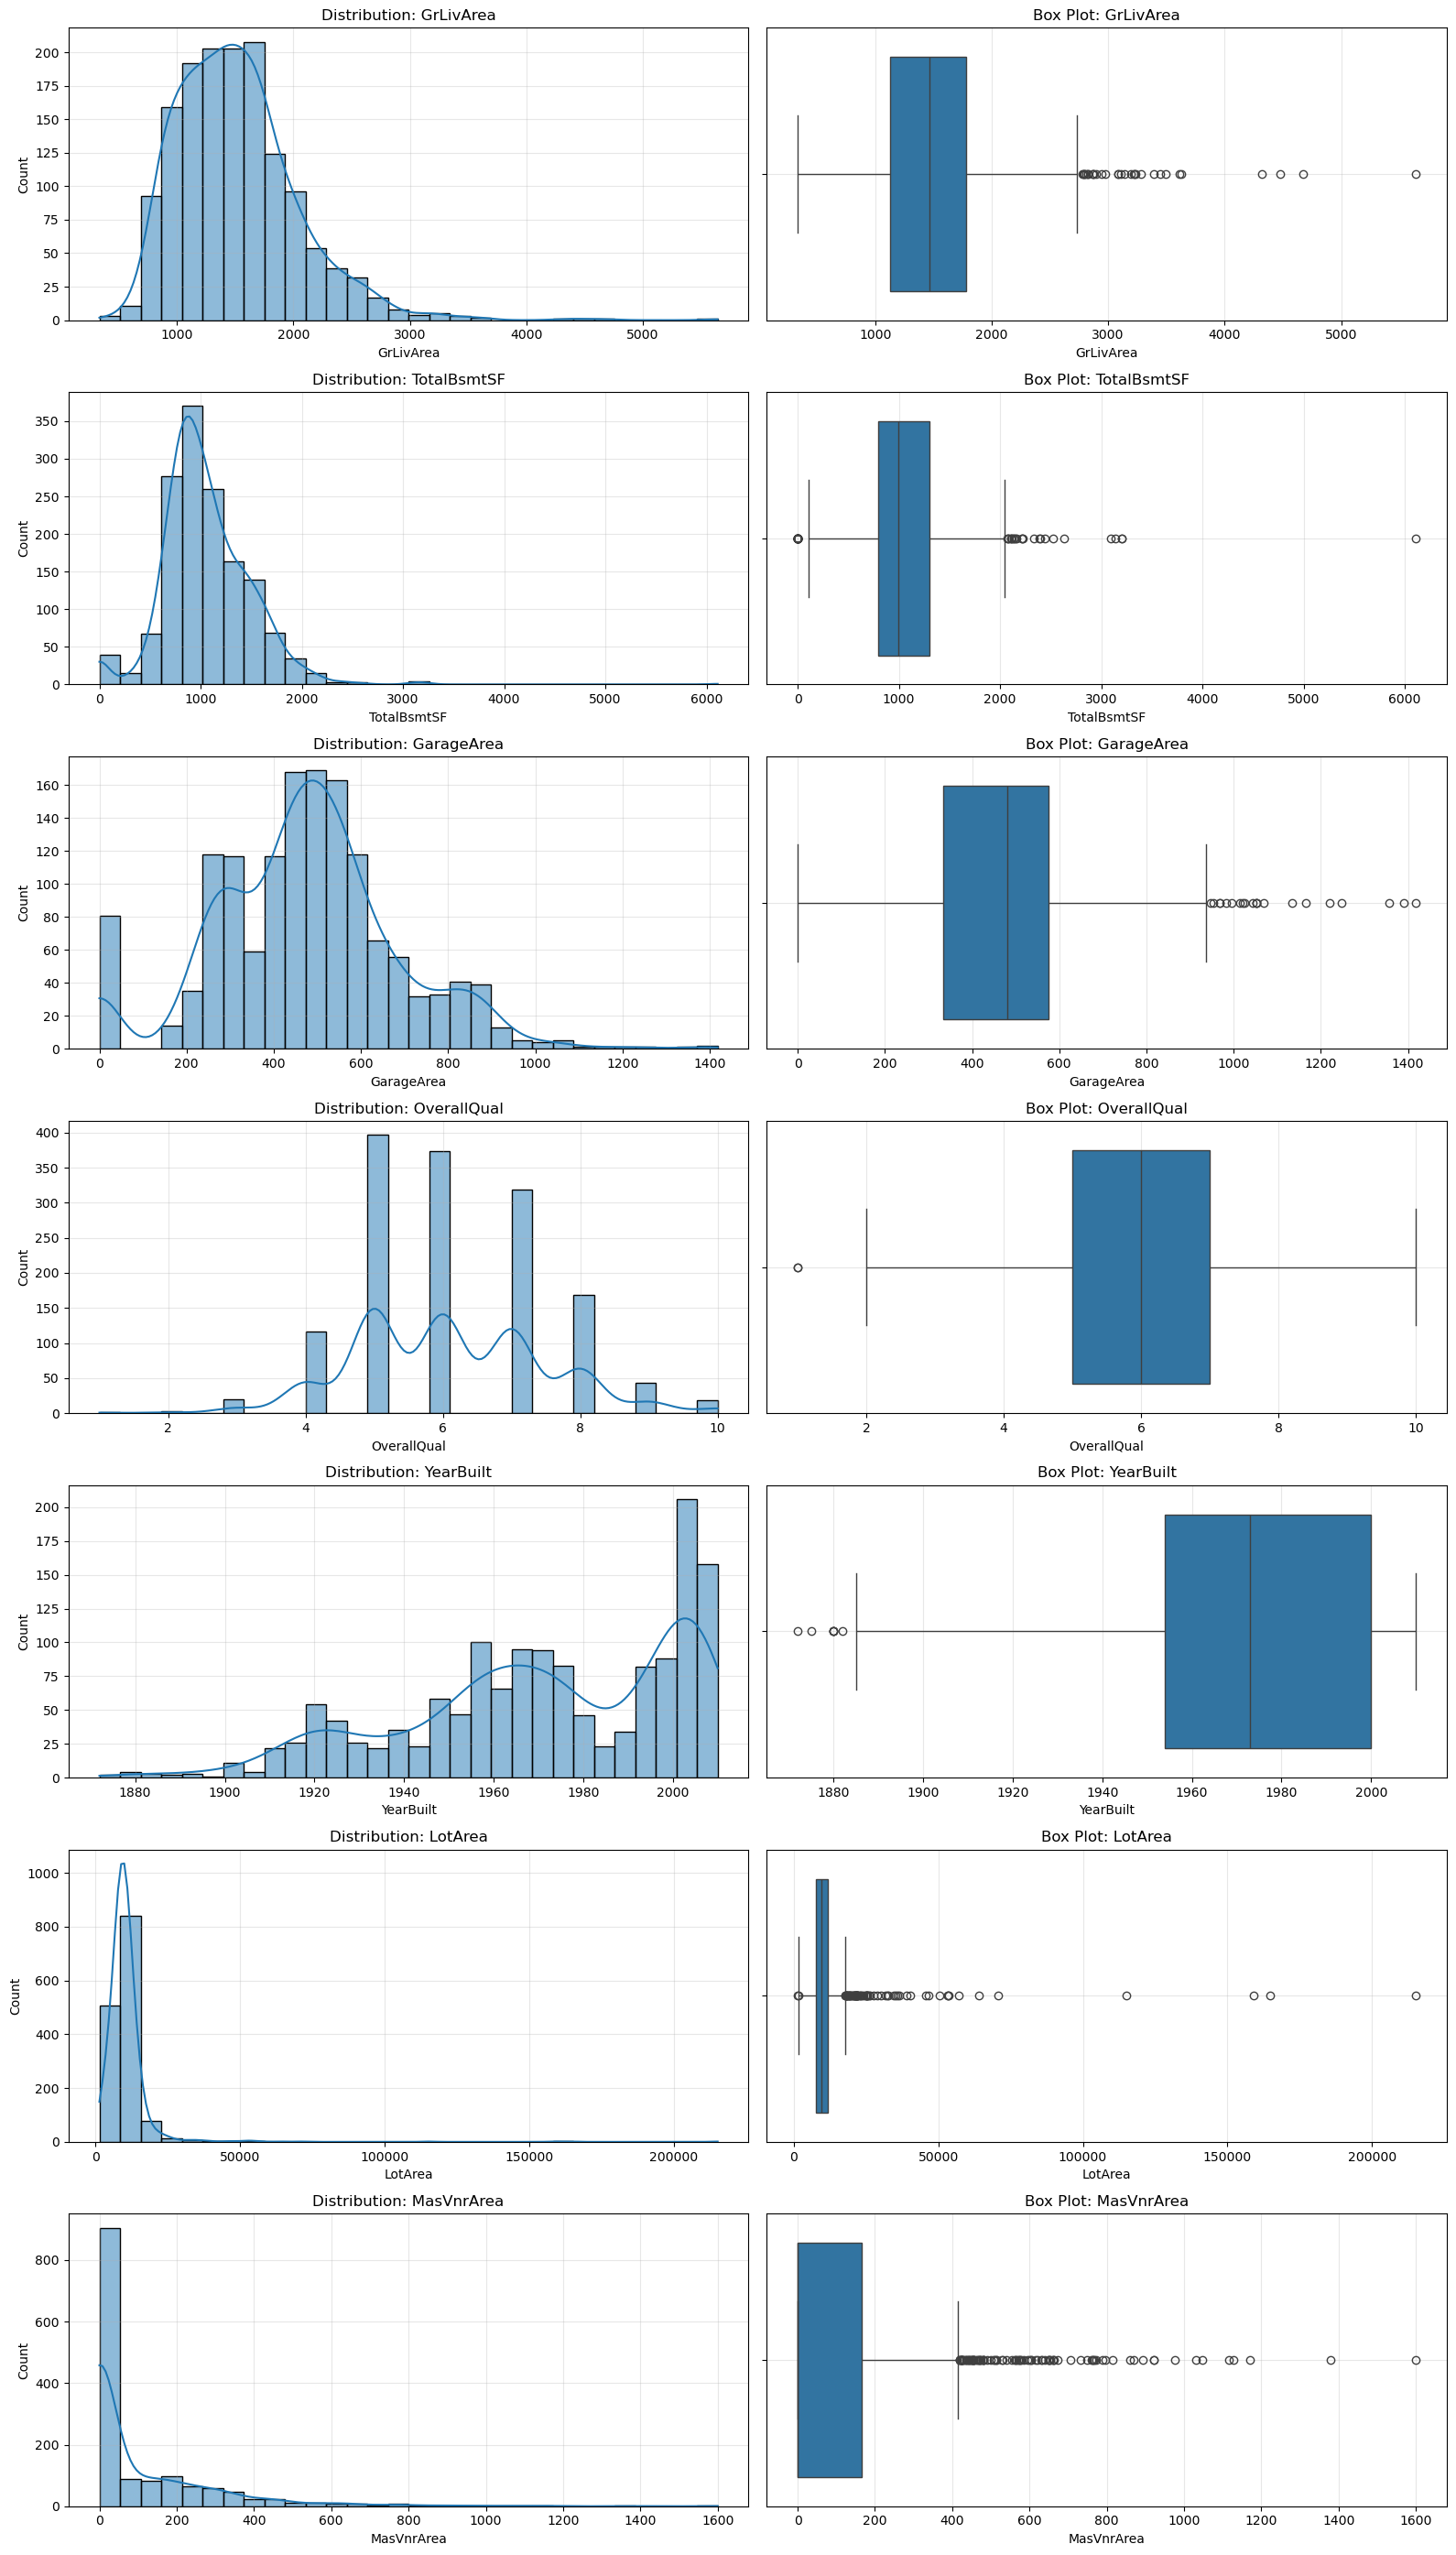

In [9]:
# by using histogram, boxplot to analyze the distribution of numerical features
# based on the results
# all the diagram is dwed to the left
# there are many outliers which means there may have many missing
cols_to_plot = ["GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual", "YearBuilt",'LotArea','MasVnrArea']

n = len(cols_to_plot)
fig, axes = plt.subplots(n, 2, figsize=(16, 4*n))

for idx, col in enumerate(cols_to_plot):
    s = df[col].dropna()

    # 1) Histogram
    sns.histplot(s, bins=30, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Distribution: {col}")
    axes[idx, 0].grid(True, alpha=0.3)

    # 2) Boxplot
    sns.boxplot(x=s, ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Box Plot: {col}")
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

I selected a small set of numerical and ordinal features that are intuitively important in real estate and represent different aspects of a house: "GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual", "YearBuilt",'LotArea','MasVnrArea'.
By doing this step, I gain a clear understand of the distributional characteristics of each featue, including skewness, outliers and overall spread. This is essential for making informed data cleaning decison, wuch as whether outliers should be retained as meaningful observations or treated as noise and whether to apply transformations for skewness which i will have to decide whether I need to remain or remove it in data cleaning. Also, it provides the necessary background information for subsequent realtionship analysis, therebu ensuring that the observed correlations with the target variable can be interpreted in a statistically and practically meaningful manner.

1. **GrLivArea**
    - Above-ground living area is one of the most direct indicators of usable space for a household as usually in real world, a larger activity area usually enhances the market value of a house, which reflects higher construction costs (materials, labor) and provides better comfort and functionality.
    - The distribution shows right-skewed pattern, with many high outliers. This indicates that there is a significant variation in the size of houses in the dataset. Most of the observations are concentrated within the medium-sized range of houses, which are typical family residences. In contrast, the longer upper tail reflects the existence of a few extremely large houses.
    - The diagram may represent luxury or particularly large-sized residences purchased by high-income buyers, while most of the observations focus on medium-sized family homes, which aligns with the "mass market with small luxury market" pattern.

2. **TotalBsmtSF**
    - Basement size captures additional floor space that can increase storage capacity, functional rooms (e.g., recreation room), and overall property utility. It will increase the house price as some residences will like to have a basement to expand the house's functional area for greater versatility and long-term usage potential, which may influence buyer preferences and sale prices. 
    - The right-skewed with many upper outliers may show that Most houses have relatively moderate basement areas while a smaller number possess exceptionally large basements. The upper outliers may be driven by differences in house design, construction practices, and nrighborhood norms.  
    - These may indicates that the developers prefer to create small or medium-sized basement areas due to practical and economic constraints rather than homeowner preference alone. Constructing larger basements require deeper earthwork, stronger foundation and structural support, which substantially increases construction costs. Therefore, very large basement are uncommon and typically appear only in high-end or custom built properties. Also, for most families, the cost-effectiveness is not high because it would require a higher price.

3. **GarageArea**
    - Garage area offers both convenient parking and additional storage space, which are highly sought-after features in many real estate markets. A larger garage can accommodate more vehicles or provide more working space, which can enhance people's perception of the quality and value of the property. While most households require only standard parking space, larger garages allow accommodation of multiple vehicles or additional functional uses, which enhances property attractiveness by improving convenience, security and oveall usability but the price will also be increasing due to more space areas and construction price.
    - The right-skewed with many upper outliers shows thatmost cluster around standard garage sizes, which reflects typical family homes with 1 to 2 car garages. The upper tail consists of a small number of properties with unusually large garages, which may correspond to luxury homes or properties owned by higehr-income households who owns more cars.
    - The uneven and fluctuating shape observed in some histograms does not indicate the data quality issues. Instead, it help to exaplain that several realistic factors, such as living area or garage size are discrete integer values rather than continuous measurements.

4. **LotArea**
    - Land size of property is an important component of real estate value, as larger plots offer more outdoor space, greater privacy, greater potential for future expansion, and higher overall appeal.
    - Strongly right-skewed with upper outliers shows that not a lot of people will like to buy a large LotArea, which may because LotArea usally in low-density areas of new development areas or on the urban fringes, which may be more unconvenitent to travel daily.
    - It indicates that the dataset contains a mixture of densely populated urban plots with smaller areas and properties in the suburbs/rural areas or at the urban fringes with larger areas. This change has made "plot area" a key indicator, which can effectively reflect "regional density and land premium differences".

5. **MasVnrArea**
    - MasVnrArea measures the area of masonry venerr, such as the exterior decoration of bricks or stones, can serve as representatives of high-quality exterior building materials and decorations. Such areas usually indicate that the building has a higher grade or a more outstanding appearance which will increase the prices as it usually requires higher quality construction or reovation.
    - Strong right-skewed with a lot of upper outliers shows that most houses have little or no masonry veneer, while only small subset of properties have sustantial exterior brick or stone finished. One possible reason is that modern construction techniques have significantly enhanced building safety, making homeowners less concerned about the practical benefits of features like masonry veneer. The buyers may also do not really concern about structural risks (e.g., heavy rain) due to improved safety standards, reducing the perceived value of additional wall protection like masonry veneer.
    - This is consistent with the characteristics of luxurious or upgraded properties. Therefore, this feature helps to identify the signals of high-end decoration, which may be associated with higher sales prices.

6. **YearBuilt**
    - The year when a house was built can indicate the era it belongs to, and this is usually related to factors such as building standards, renovation needs, energy efficiency, and modern layout preferences. Newer houses usually have a higher value because they have lower maintenance costs and may use newer materials/designs; while older houses may have a lower price unless they have historical value or require extensive renovations.Also, housing prices are influenced by technological and reguulatory changes in construction over time.
    - Lightly bimodal pattern of left-skewed with few outliers shows that most people prefer to buy new houses. This may indicate that the newer houses are often developed in areas with better surrounding infrastructure and amenities, suchh as shopping mall or schools. Alternatively, buyers may choose newer but less centrally located houses in the same srounf price of older houses due to more attractive designs or modern layouts, even if the transportation is inconvenient. Also, it may also show that significant proportion of buyers in the market have sufficient purchasing power to afford newer homes, which are typically priced higehr than older properties.

7. **OverallQual**
    - Two houses with similar size and layout may have significant price differences due to variations in materials, decoration, and overall construction standards. The OverallQual can more effectively reflect these differences and is more capable of predicting the selling price of the property than individual component features. Therefore, OverallQual is more effective in capturing these differences than the individual component-level feature, smaking it one of the strongest predictors of SalePrice in real estate valuation.
    - The distribution is slightly right-skewed, as higher quality ratings (8–10) occur less frequently but are still present, representing a smaller segment of higher-end homes. Very low quality ratings (1–3) are rare, suggesting that extremely poor-condition houses are uncommon in the observed sales data.
    - It is assumed that OverallQual is applied consistently across all properties, such that higher ratings reflect genuinely better construction and finishing quality. The concentration of values around 5–7 represents the dominant housing stock in Ames rather than data bias. Due to its bounded ordinal scale, the limited number of outliers is expected, making OverallQual a stable and reliable predictor of housing prices.

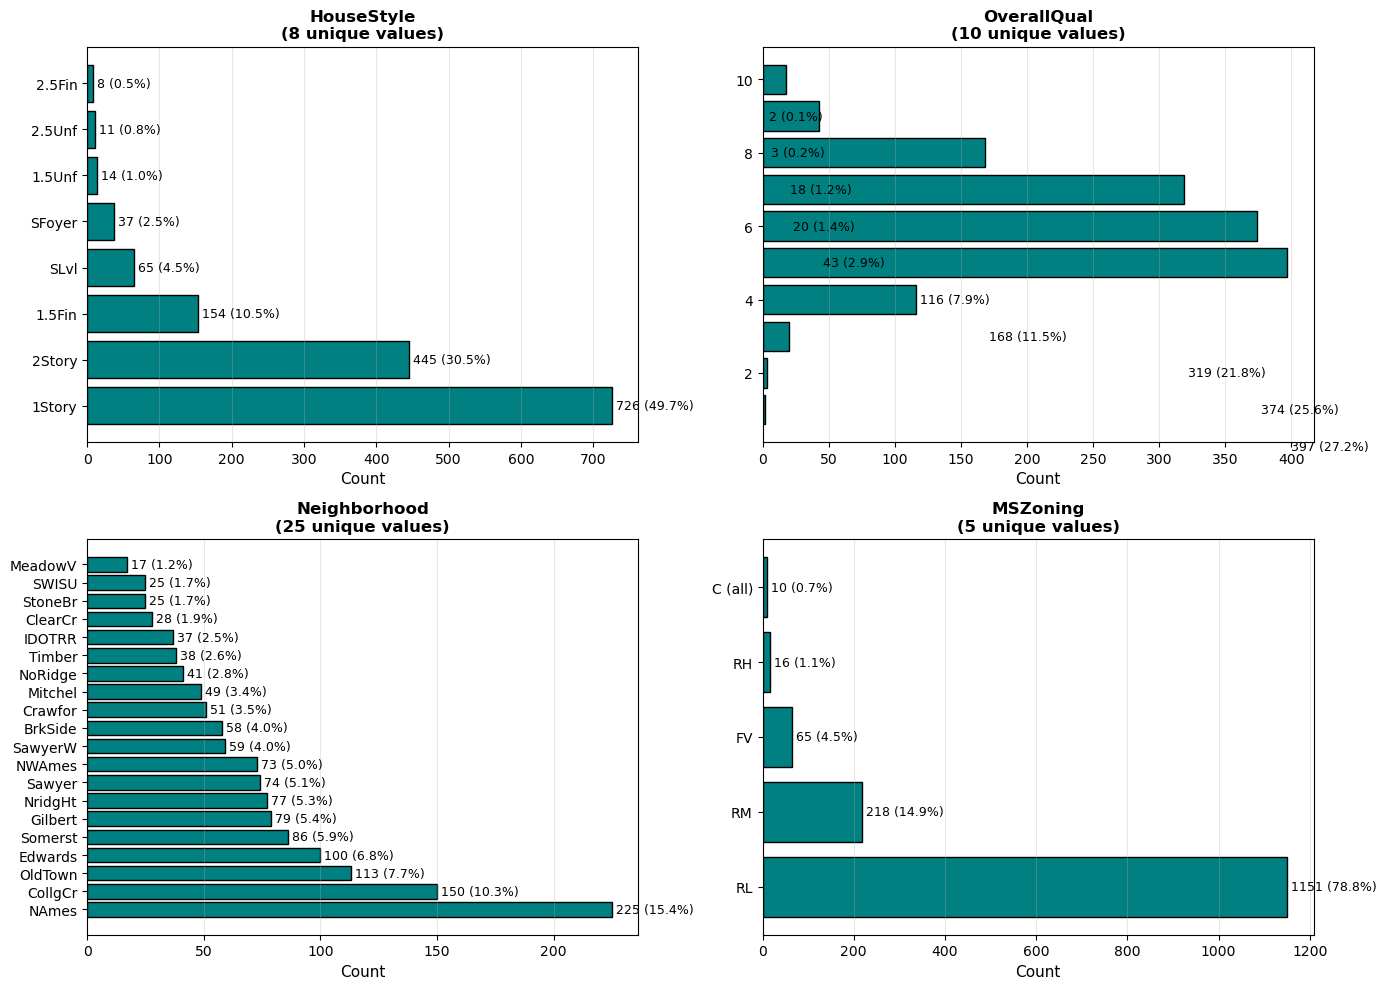

In [10]:
key_categoricals = ['HouseStyle', 'OverallQual', 'Neighborhood', 'MSZoning']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_categoricals[:4]):
    value_counts = df[feature].value_counts().head(20)
    axes[idx].barh(value_counts.index, value_counts.values, color='teal', edgecolor='black')
    axes[idx].set_xlabel('Count', fontsize=11)
    axes[idx].set_title(f'{feature}\n({df[feature].nunique()} unique values)', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')
    
    # Add percentage labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v} ({v/len(df)*100:.1f}%)', 
                      va='center', fontsize=9)

plt.tight_layout()
plt.show()

I selected a small set of nCategorical features that are intuitively important in real estate and represent different aspects of a house: 'HouseStyle', 'OverallQual', 'Neighborhood', 'MSZoning'. By performing this step, I understand whether the features are balance or imbalance which may cause overfitting or underfitting after deciding betwwen the one-hot encoding and frequency encoding. This helps me to decide whether I want to drop, combine the categorical by using frequency encoding. Also, there are some "NA", "None" values which may cause...Check ordinal or nominal is good... there are so many variables which will be overfitting by using the one- hot encoding. Therefore I have to decide what to use frequency/target encoding. Moreover, the presence of values such as "NA" or "none" has been identified, and their interpretation as representing real missing data or meaningful missing values has been considered in the context of this issue, thereby guiding appropriate preprocessing strategies. 

1. **HouseStyle**
    - HouseStyle refelcts a structural layout and number of floors of a house, which directly affects construction cost, land usage and living convenience. Different buyers naturally have different preference of houses style. Usually, larger or taller houses will cost more, as they require more complex structural designs and longer construction time.In many cases, the construction of houses is tailored to the needs of specific user groups. For instance, older homebuyers usually prefer 1Story houses without stairs, as it avoids the inconvenience of climbing stairs; while large families may opt for multi-story houses to separate the living area from the sleeping area. 
    - However, the diagram shows that most people prefer 1Story, which indicates taht the majority of buyers prefer simple and practical layouts. This might suggest that most buyers in Ames have a moderate bufegt and place more empahsis on practically rather than the size of the houses. Morever, features, such as garage and basements allow homeowners to expand the usable space without increasing the number of floors, reducing the demand for higher or complax house design.
    - Next will be Split Level houses, which indicates that a portion of home buyers value personalized layouts and flexible space utilization methods. In contrast, higher and larger house types, such as 2.5Story houses, occur much less frequently. This implies that very large or very tall houses may have lower cost-effectiveness due to higher maintenance costs and more complex management complexities. Thus, there are less attractive to most home buyers. Such houses are more likely to be purchased by wealthier home buyers, as they can afford the higher purchase price and the long-term maintenance costs.

2. **OverallQual**
    - Rates the overall material and finish of the house which may relate to factors such as Building material grades, construction techniques and overall completion rate. This will affect the saleprice as it requires greater construction costs, stricter safety standards and need to hire more advanced construction techniques.Therefroe, mmore buyers will prefer a safer and more durable houses. As a result, properties with high exterior quality ratings tend to command higher sale prices.
    - However, the diagram above shows that most of buyers choose Average/Typical (5-6), followed by Good (6-8), indicating that the majority of properties in the dataset have moderate to good exterior quality rather than exceptional quality. This distribution is realistic in a real world housing market where houses with extremely poor exterior are uncommon as they are often renovated, rebuilt or removed from market to meet minimum legal and safety standards. ALso, it may because that buyers are more focused on interiror layour, finished and living comfort rather than exterior appearance alone. Alternatively, after purchasing a property, homeowners often realize that interior-related issues, such as inconvenient layouts, poor bathroom flooring or low-quality interior finishes, have a much greater impact on daily living experience. 

3. **Neighborhood**
    - The most common communities, such as Namas, Colgri District and the Old Town, are mature and stable residential areas in Ames City, featuring complete infrastructure, excellent transportation convenience, and housing types that meet the mainstream market demands. These areas strike a balance between affordability and quality of life, resulting in a high transaction volume and a larger proportion in the data set. Their prevalence reflects supply-side factors, such as a larger housing stock, as well as the demand-side preference for stable, convenient and family-friendly communities. The reason for choosing "Neighborhood" as a distribution feature is that it can reveal the composition of the data in different residential areas, thereby helping to determine whether the data is mainly driven by the mainstream market or the niche market.

4. **MSZoning**
    - "MSZoning" was selected as a distribution feature because it describes land use regulations and types of residential planning, which help to depict the overall structure of the housing market represented in the dataset, rather than directly explaining housing prices. It is assumed that "MSZoning" mainly reflects urban planning restrictions rather than directly serving as a pricing factor, and the more frequent zoning categories represent the mainstream residential market rather than niche or luxury market segments. Based on this assumption, buyers typically prefer low-density living environments because such environments offer better living conditions, higher privacy, and greater long-term investment value. The chart shows a highly uneven distribution, with "RL" (low-density residential) accounting for approximately 78.8% of the observations, indicating that the dataset is mainly composed of low-density, family-oriented housing. This reflects the urban structure of Ames City, the abundant supply of such properties, and the continuous demand of typical homebuyers. In contrast, other zoning categories such as RM, FV, RH, and C have much lower frequencies, which are consistent with the restrictions on land allocation and the exclusivity of specific purposes. Overall, this distribution pattern confirms that the dataset mainly represents the mainstream residential market, providing important background information for analyzing the relationship between the features and the target variable.

### 2.3.2 Understanding relationship between variables

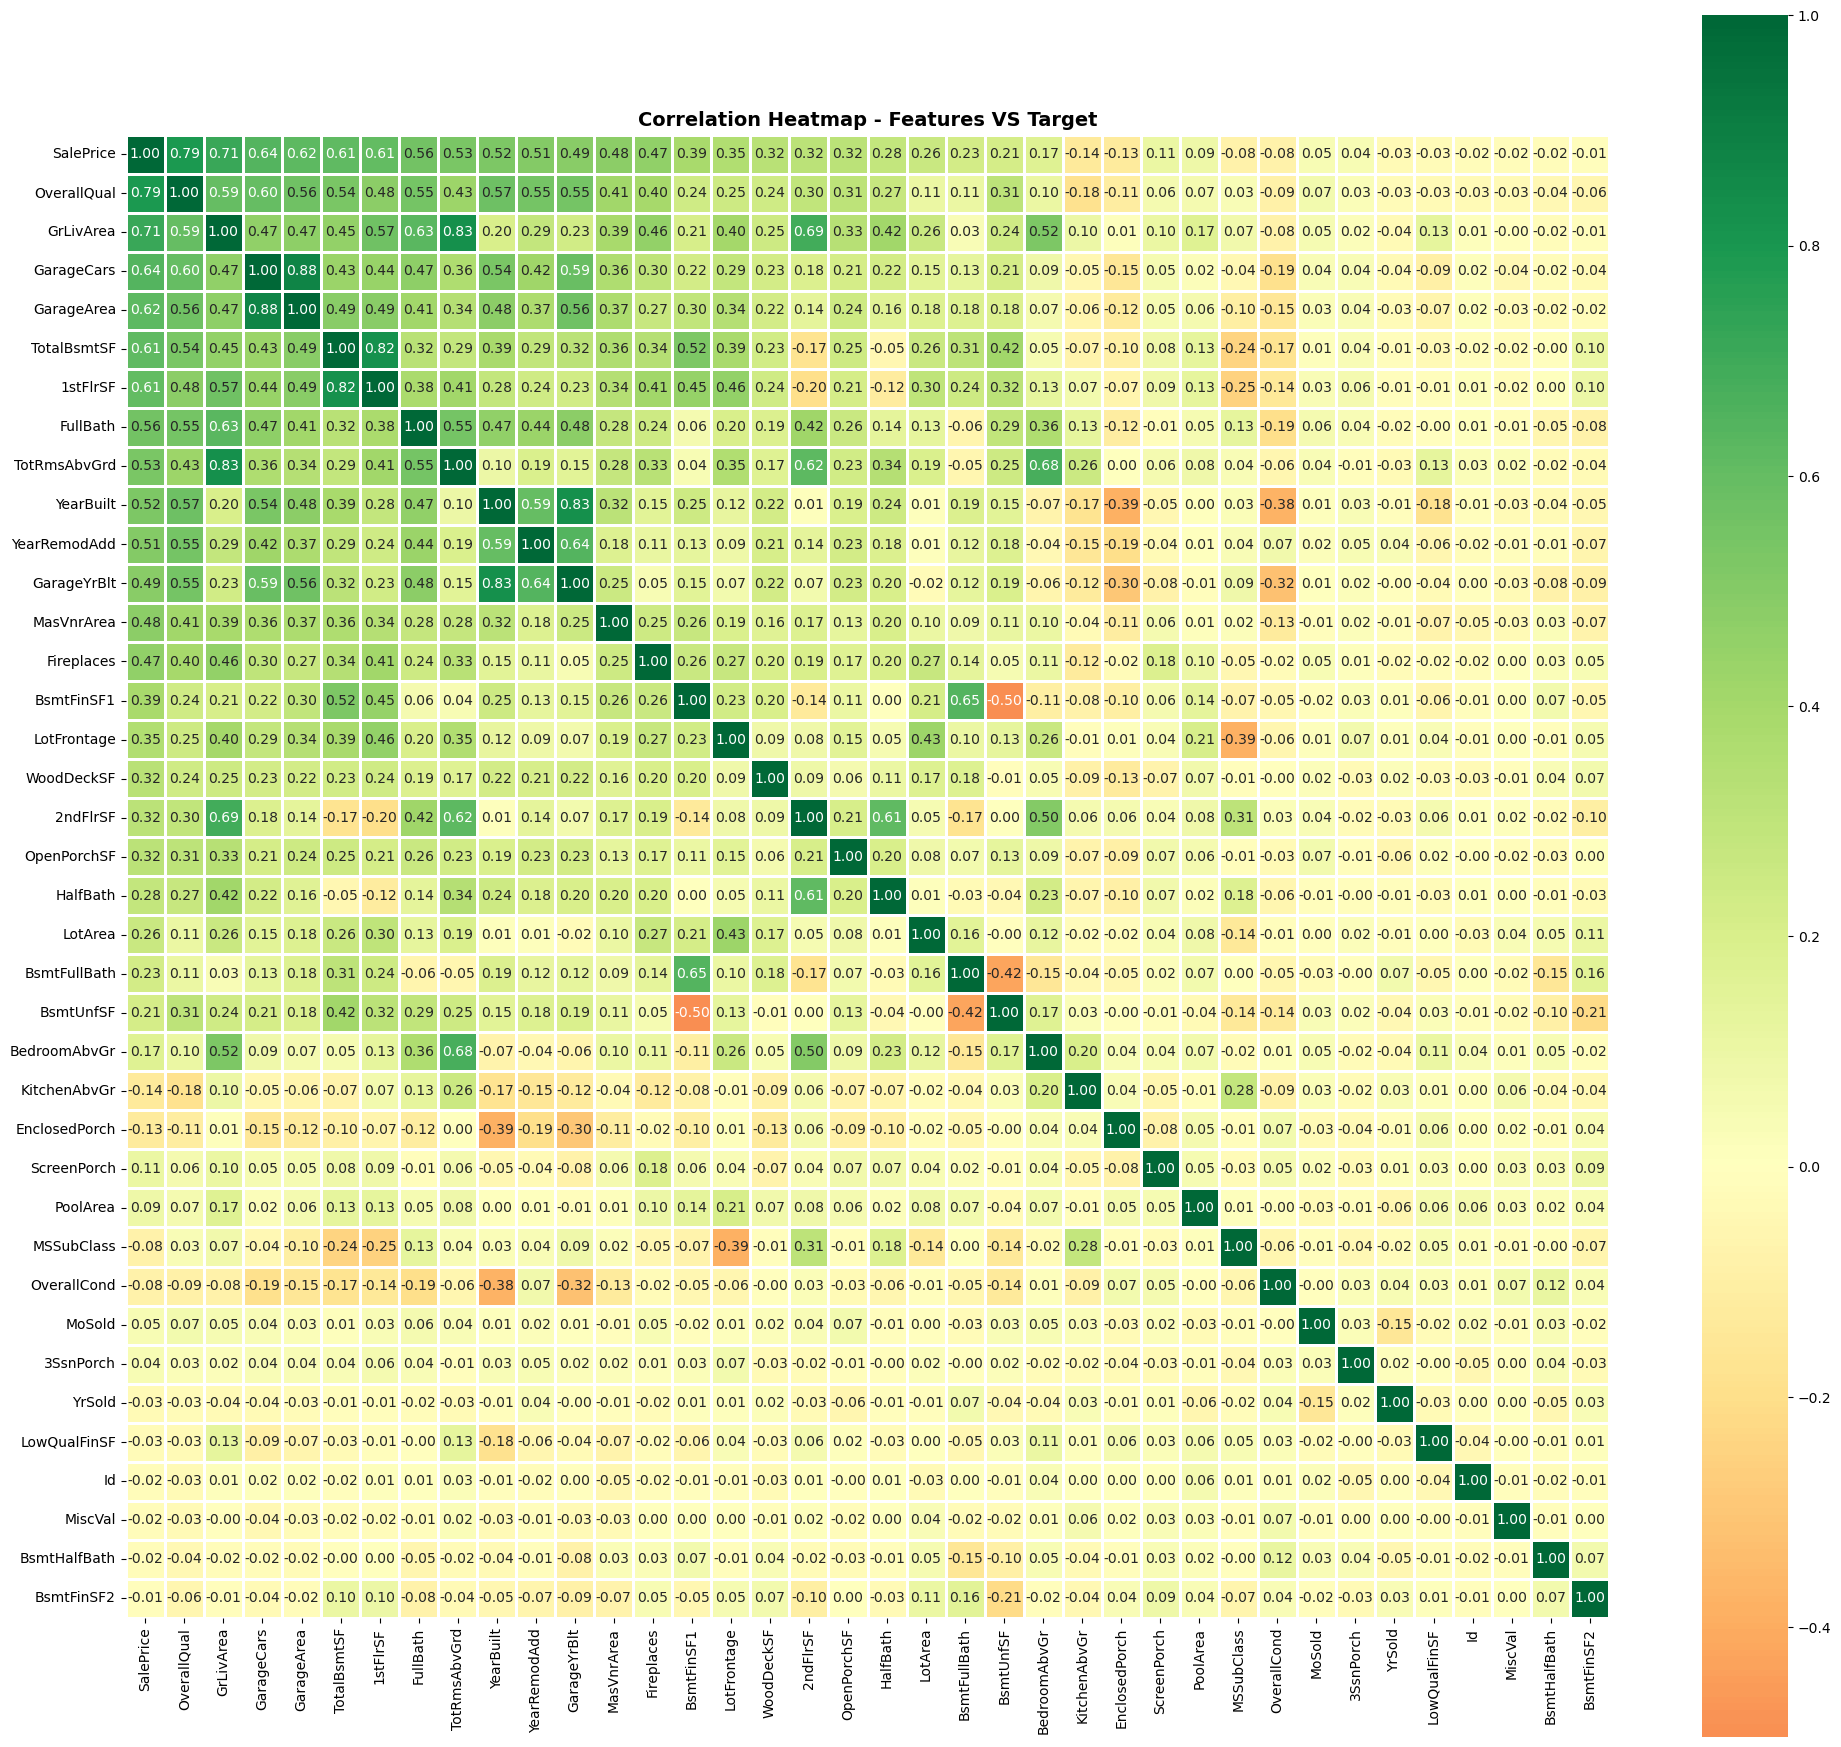

In [11]:
numeric_df = df.select_dtypes(include=[np.number]).copy()

correlations = (
    numeric_df.corr()["SalePrice"]
    .abs()
    .sort_values(ascending=False)
)

corr_matrix = df[correlations.index].corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Features VS Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

The correlation heatmap is a powerful visualization that displays the **strength and direction of linear relationships** between all pairs of numerical features, including the target variable (SalePrice). Each cell shows the correlation coefficient ranging from -1 to +1: Strong positive correlation （0.7-1.0 Green） means features increase together, weak correlation (around 0， Yellow) means little or no linear relationship, and strong negative correlation (-1.0 to -0.7, Red) means features move in opposite directions.

---

**Key Benefits of This Analysis:**

1. **Identify Top Predictors**: Features with high correlation to SalePrice (e.g., OverallQual ≈ 0.79, GrLivArea ≈ 0.71) are strong candidates for the model, as they have strong linear relationships with the target. Also, they do not have any missing values which means that these 2 are very important for the afterwards coding.

2. **Multicollinearity**: Multicollinearity occurs when two or more features are highly correlated with each other, such as GarageCars and GarageArea (correlation ≈ 0.88), meaning they carry largely redundant information. In a linear regression model, this redundancy can lead to coefficient value inflation, cause numerical instability, and make it difficult to reliably interpret the importance of the features. To address this issue, a common approach is to retain one feature from each pair of highly correlated features based on domain relevance, or to apply dimensionality reduction techniques，such as Principal Component Analysis (PCA) to combine the correlated features into a smaller set of independent components.

3. **Feature Redundancy**: If TotalBsmtSF and 1stFlrSF are highly correlated, it shows that both features introduces redundancy and provides minimal additional predictive value. Removingone of them or create a new feature will help to reduce multicollinearity, and improves interpretability without sacrificing performance. Therefore, this issue is best addressed during the feature engineering stage.

4. **Guide Model Selection**: 
   - Linear models, such as Linear Regression, Ridge, and Lasso, are sensitive to multicollinearity, which often require the removal of highly correlated features. Tree-based models (Random Forest, XGBoost) are less affected but still benefit from reduced feature redundancy for faster training and less overfitting.

5. **Validate Domain Knowledge**: The heatmap confirms our real estate intuition that Quality metrics (OverallQual, ExterQual) strongly correlate with price and Size metrics (GrLivArea, TotalBsmtSF) strongly correlate with price.

6. **Missing Value**: The correlation information is extremely valuable for deciding how to handle missing values:
   
   **a) Smart Imputation Strategy:**
   - If a feature with missing value, such as GarageArea, is **highly correlated** with another complete feature (e.g., GarageCars ≈ 0.88), I can use **predictive imputation** (linear regression, KNN) to estimate missing values based on the correlated feature rather than simply using mean/median.
   - Example: If GarageArea is missing but GarageCars = 2, I can predict GarageArea based on their strong correlation.
   
   **b) Prioritize Which Features to Keep/Drop:**
   - If a feature has **many missing values AND low correlation with SalePrice** (e.g., < 0.2), it's a strong candidate for **deletion** as the effort to impute may not be worth the minimal predictive gain.
   - In contrast, if a feature with missing values has **high correlation with SalePrice** (e.g., > 0.5), it is worthwhile to invest effort in researching complex prediction methods in order to retain this valuable predictive indicator.
   
   **c) Understand Missing Value Patterns:**
   - If features that logically should correlate (e.g, GarageType, GarageCars, GarageArea) all have missing values for the same observations, this suggests **structured missingness** (e.g., "No Garage") rather than random data loss.
   - In such cases, missing values should be treated as **meaningful category** (e.g., fill with "None" or 0) rather than imputed with statistical methods.

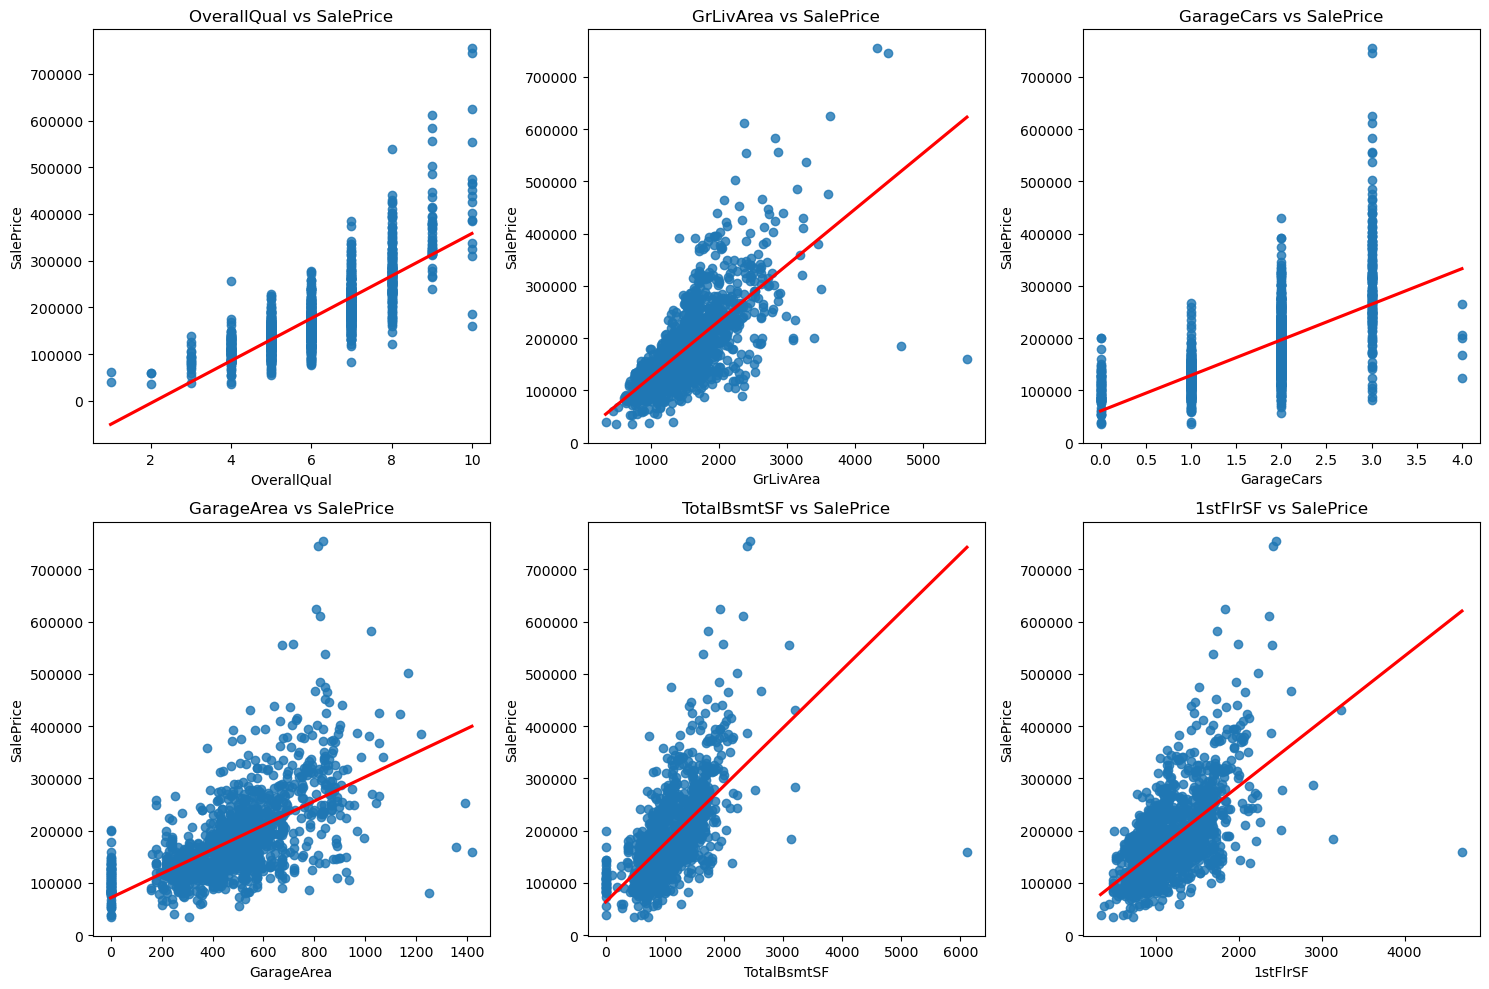

In [12]:
top5_features = correlations.drop('SalePrice').head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top5_features):
    sns.regplot(
        x=feature,
        y='SalePrice',
        data=df,
        ax=axes[i],
        ci=None,
        line_kws={'color':'red'}
    )
    axes[i].set_title(f'{feature} vs SalePrice')
    
plt.tight_layout()
plt.show()


The scatter plot further confirms the strong linear relationship shown in the related heatmap, and also reveals outliers and uneven variance situations. These insights support the use of appropriately transformed linear models and provide a basis for further feature engineering.

1. **OverallQual vs SalePrice**: 
    - This scatter plot shows that as the overall condition rating increases, the house prices exhibit a clear upward trend gradually. This confirms that it has a strong and stable predictive ability, which goes beyond the scope represented by mere correlation. However, this relationship is not deterministic because there is still a significant price variation within the same quality grade range. This indicates that although OverallQual is a powerful and stable predictive indicator, house prices are also influenced by other factors such as location, area, and market conditions. Therefore, the observed trend reflects a probabilistic correlation rather than a definite price increase.
    - The regression lines highlights the overall positive linear trend, while most scattered points are concentrated in the lower-left region. This indicates that this relationship is probabilistic rather than absolute. That is to say, the higher the quality, the higher the price may be, but this does not guarantee that there will definitely be a higher price.

2. **GrLivArea vs SalePrice**：
    - In the scatter plot of GrLivArea vs SalePrice, it can be observed that there is a clearly positive linear trend overall. The red regression line clearly indicates that the larger the living area, the usually higher the house price. However, even with the same or similar living areas, there is still a considerable range of variation in house prices. For example, two houses have a GrLivArea of approximately 2000 square feet each, but one may be priced at around 250,000 while the other exceeds 350,000. 
    - This difference does not imply that the data contains noise or errors; rather, it reflects the fact that the living area alone cannot fully explain the differences in housing prices. Other factors, such as Neighborhood, OverallQual, the condition of the decoration, and the market timing, can cause significant price variations under the same area conditions. Therefore, this dispersion represents the true price heterogeneity (price heterogeneity) and the variations that cannot be captured by a single characteristic, rather than pure random noise.

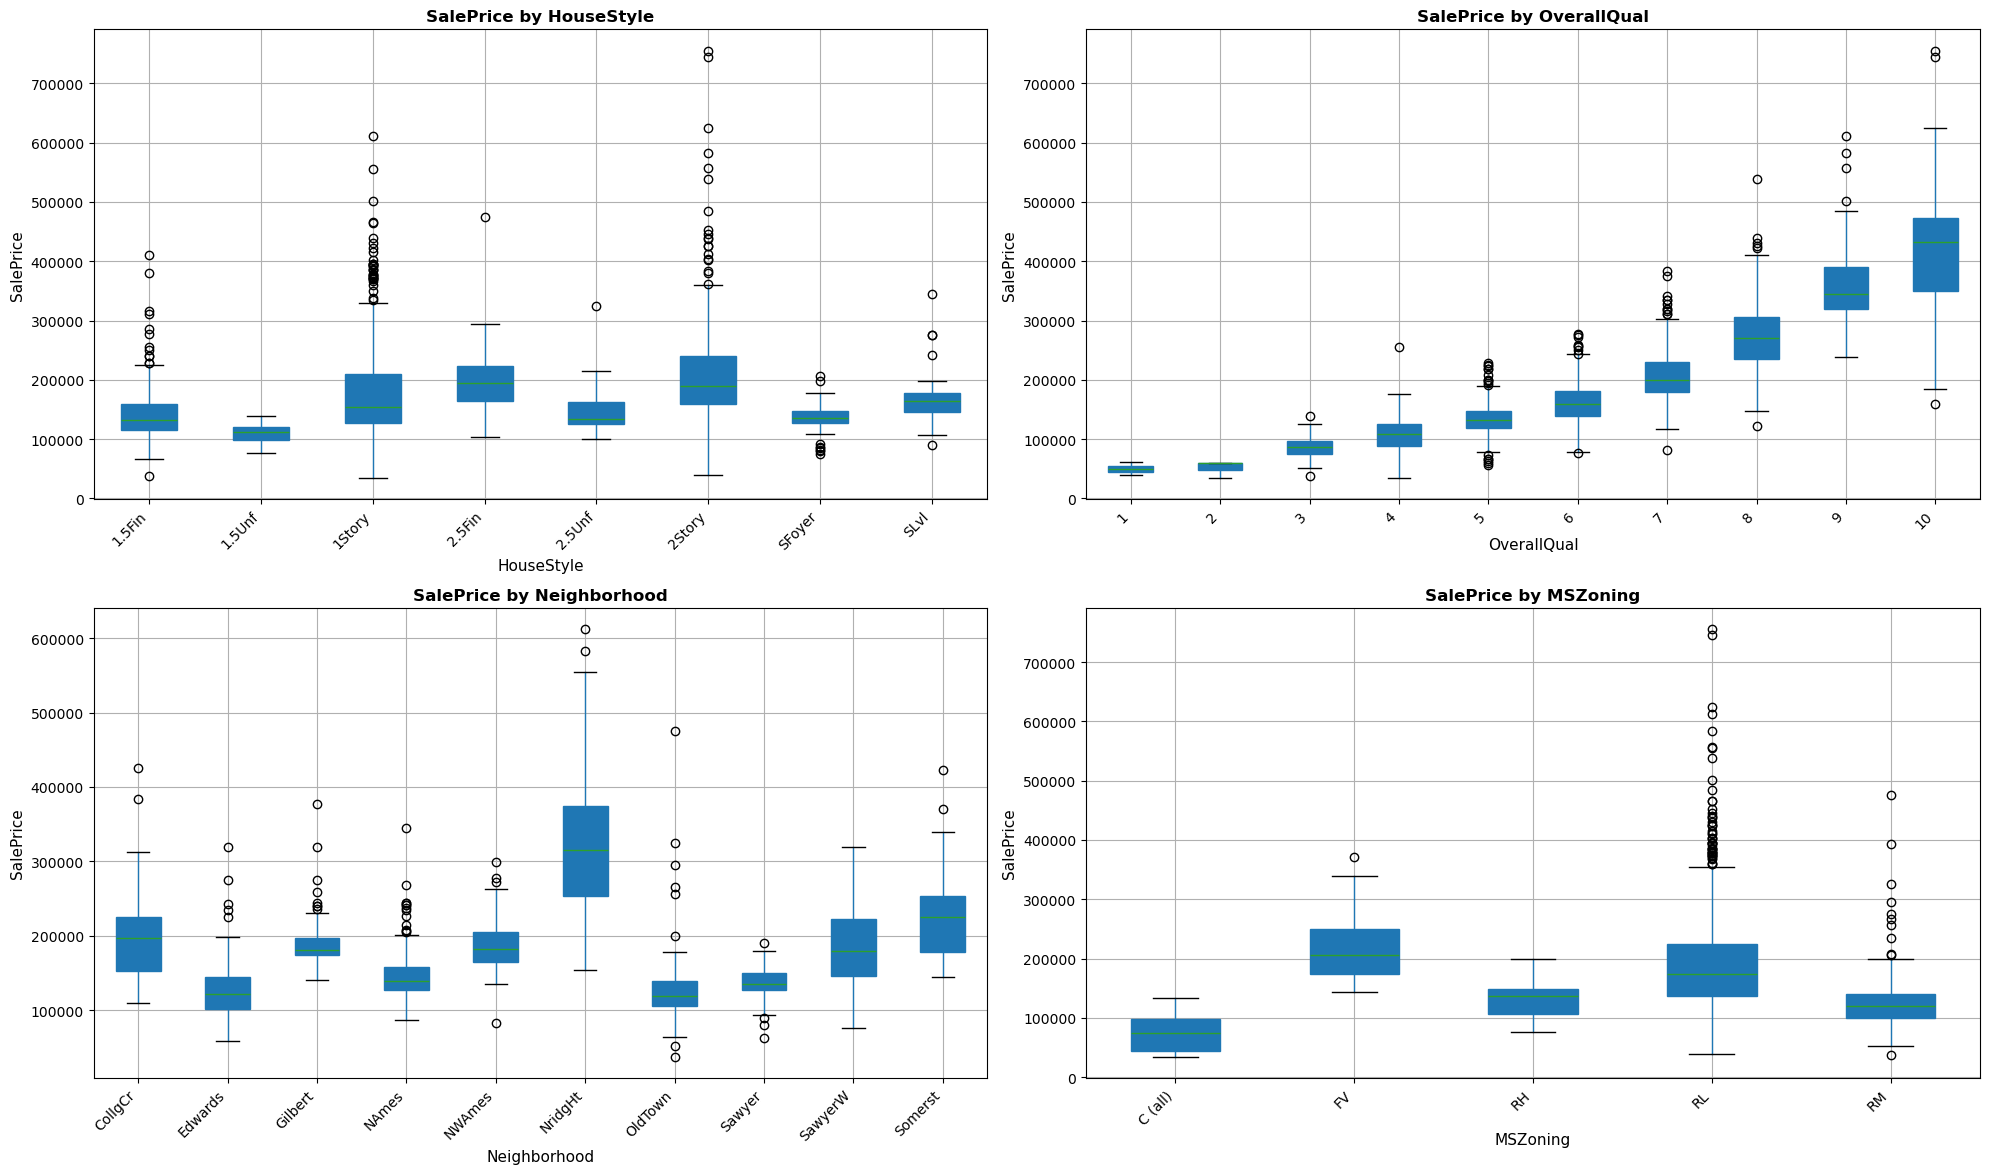

In [13]:
if target_col in df.columns and len(key_categoricals) > 0:
    # Analyze top categorical features
    num_cat_to_analyze = min(4, len(key_categoricals))

    if num_cat_to_analyze > 0:
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        axes = axes.flatten()
        
        for idx, cat_col in enumerate(key_categoricals[:num_cat_to_analyze]):
            # Box plot
            df_plot = df[[cat_col, target_col]].dropna()
            
            # Limit categories if too many
            top_categories = df_plot[cat_col].value_counts().head(10).index
            df_plot_filtered = df_plot[df_plot[cat_col].isin(top_categories)]
            
            df_plot_filtered.boxplot(column=target_col, by=cat_col, ax=axes[idx], 
                                     patch_artist=True, grid=True)
            axes[idx].set_xlabel(cat_col, fontsize=11)
            axes[idx].set_ylabel(target_col, fontsize=11)
            axes[idx].set_title(f'{target_col} by {cat_col}', fontsize=12, fontweight='bold')
            axes[idx].tick_params(axis='x', rotation=45)
            plt.sca(axes[idx])
            plt.xticks(rotation=45, ha='right')
            
            # Remove automatic title from pandas boxplot
            axes[idx].get_figure().suptitle('')
        
        plt.tight_layout()
        plt.show()

By comparing the median positions of the box plots of different categories, one can intuitively determine whether this feature has the ability to distinguish price levels. If the median values of different categories differ significantly, such as OverallQual and some Neighborhoods, it indicates that this feature has a strong correlation with house prices and is a key feature that should be retained in modeling; conversely, if the box heights of multiple categories overlap and the median values are close, this feature has limited explanatory power for house prices and can be considered for weight reduction, category merging, or exclusion during the feature selection stage. 

Additionally, the IQR reflects the degree of price fluctuation within the same category. Categories with a smaller IQR typically have a stable and predictable price distribution, while categories with a larger IQR indicate high internal heterogeneity, meaning that within the same category, there may be both low-priced and high-priced houses. Such characteristics often require the combination of other variables, such as OverallQual or area-related features, in modeling, or even the introduction of interaction terms to more accurately depict the price structure. 

Finally, **outliers** provide crucial clues about extreme samples. If there are a large number of high-price or low-price outliers in a certain category, it may indicate that this category contains multiple hidden subgroups, for example, high-quality houses are concentrated in a few sub-regions, rather than simple data noise. This helps in making subsequent judgments on whether further feature segmentation, component modeling is needed, or emphasizing the conclusion that "there are significant differences within the category" when interpreting the model results. 
Overall, these box plots not only help determine which categorical features are "important", but also provide intuitive and powerful evidence for the selection of encoding methods, such asOne-Hot, strategies for handling outliers, and whether to introduce interaction features.

# 3. Data Preparation

## 3.1 Data Cleaning

In [14]:
## Clean data
# there already has a default id when we read the data, and id has no correlation with Sale Price
df = df.drop(columns=["Id"],axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
#drop features with less meaningful values
df = df.drop(columns=["PoolQC"],axis=1)
df = df.drop(columns=["MiscFeature"],axis=1)
df = df.drop(columns=['Alley'],axis=1)
df = df.drop(columns=['Fence'],axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


1. Based on the codes of "df.info" & missing_data diagram, it shows that, PoolQC、MiscFeature、Alley、Fence, shows too many missing values and exceed 80%. It's not occasionally missing the information, but rather a vast majority of houses do not have these features, such as no swimming pool, no path, no special facilities, no fence. If it is insisted on being retained, complex filling and encoding would have to be designed for the very small number of "samples with this facility", but this would have a limited contribution to the overall model.

2. From "describe(include='all')" & overall understanding of classification features, it is obvious that the categories are extremely unbalanced and non-empty values only appear in a very small number of high-end or personalized residences.

3. High missing rates, extremely imbalanced category distribution, and features that occur very rarely in the data often fail to provide stable and generalizable predictive information for the model. In tree models, such features are easily mistaken for having discriminatory capabilities, resulting in "noise splitting points" that are only effective on the training set and exhibit unstable performance on the test set, leading to overfitting. In linear or regularized models, after One-Hot encoding, highly sparse dummy variables are generated. Due to insufficient sample support, the correlation coefficients are difficult to be stably estimated, providing limited contribution to prediction but significantly increasing model complexity. 

Therefore, removing features with extremely high missing rates, severe imbalance, and low occurrence frequency helps reduce noise and overfitting, leading to a simpler, more stable model with better generalization performance.

<Figure size 1600x1000 with 0 Axes>

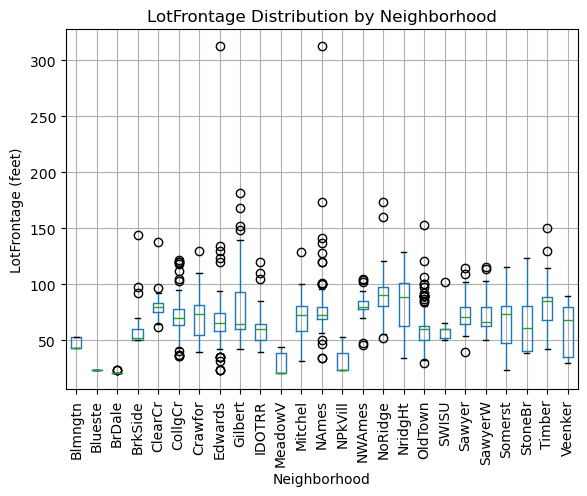

In [16]:
plt.figure(figsize=(16, 10))
df.boxplot(column='LotFrontage', by='Neighborhood', rot=90)
plt.title('LotFrontage Distribution by Neighborhood')
plt.suptitle('')  # Remove default titlez
plt.ylabel('LotFrontage (feet)')
plt.show()

The box plot shows that there are significant differences in the land area of the plots among different communities, indicating a close correlation with the geographical location. This suggests that the simple global interpolation method is not applicable. Therefore, community-based median interpolation is a more appropriate strategy for handling the missing values of land area of the plots.

In [17]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage']\
                      .transform(lambda x: x.fillna(x.median()))

In [18]:
missing_garage_year = df[df['GarageYrBlt'].isna()]

missing_garage_year[['GarageYrBlt', 'GarageArea', 'GarageCars', 'GarageType']].head(10)

,GarageYrBlt,GarageArea,GarageCars,GarageType
39,NaN,0,0,NaN
48,NaN,0,0,NaN
78,NaN,0,0,NaN
88,NaN,0,0,NaN
89,NaN,0,0,NaN
99,NaN,0,0,NaN
108,NaN,0,0,NaN
125,NaN,0,0,NaN
127,NaN,0,0,NaN
140,NaN,0,0,NaN


In [19]:
df['GarageYrBlt']  = df['GarageYrBlt'].fillna(0)

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    df[col] = df[col].fillna(0)

By checking the missing records of "GarageYrBlt", we found that the values of "GarageArea", "GarageCars" and "GarageType" for these houses were also all missing. This consistent pattern indicates that these missing values are structural, which may because the property has no garage, rather than random data input errors. Therefore, median imputation would incorrectly assign a reasonable construction year to houses without garages, thereby introducing contradictory and misleading information. A more logical approach would be to consider these cases as "no garage" and only fill in the "GarageYrBlt" for the actual houses with garages. And all the other garage features are all fill with 0.

In [20]:
missing_fp = df[df['FireplaceQu'].isna()]
missing_fp[['FireplaceQu', 'Fireplaces']].head(10)

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
17,NaN,0
18,NaN,0
19,NaN,0
26,NaN,0
29,NaN,0


In [21]:
# Fill missing values representing "Not Available"
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

The samples with missing values for FireplaceQu revealed that the number of Fireplaces for all these houses was 0. This indicates that the missing values were not due to data entry errors but rather because the houses did not have fireplaces at all. In this case, the attribute "quality of fireplace" is not applicable to these houses, so the missing values have a clear business meaning, namely "no fireplace". If the FireplaceQu values were simply deleted or filled in using statistics, such as mode, it would not only lose the important structural information of "whether there is a fireplace" but also introduce false signals that do not conform to reality. By explicitly filling the missing values with 'None', it is equivalent to treating "no fireplace" as an independent and meaningful category, maintaining the semantic integrity of this feature.

In [22]:
missing_bsmt = df[df['BsmtQual'].isna()]

missing_bsmt[['BsmtQual', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2']].head(10)

,BsmtQual,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2
17,NaN,0,0,0
39,NaN,0,0,0
90,NaN,0,0,0
102,NaN,0,0,0
156,NaN,0,0,0
182,NaN,0,0,0
259,NaN,0,0,0
342,NaN,0,0,0
362,NaN,0,0,0
371,NaN,0,0,0


In [23]:
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    df[col] = df[col].fillna('None')

Base on observation, BsmtQual revealed that these houses exhibited a highly consistent pattern in the numerical characteristics related to the basement: TotalBsmtSF, BsmtFinSF1, and BsmtFinSF2 were all 0. This result clearly indicates that the missingness of BsmtQual was not due to the lack of quality information being recorded, but rather because these houses did not have basements at all. In other words, the attribute of "basement quality" is not applicable to these types of houses and is a typical structural deficiency. If such missing values are simply filled in using statistical quantities, such as the mode or median, it is equivalent to artificially assigning a fictitious basement quality grade to "houses without basements" in the data. Logically, this is unreasonable and can introduce misleading information. By explicitly marking the missing BsmtQual values as 'None', it is possible to clearly distinguish between the two fundamentally different situations of "no basement" and "having a basement but with different quality". 

In [24]:
df['MasVnrArea']  = df['MasVnrArea'].fillna(0)
df['MasVnrType']  = df['MasVnrType'].fillna('None')

# Fill missing values - categorical features with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

1. MasVnrArea:
    - From the box plot of MasVnrArea in Data Understanding, it can be directly observed that the median is very close to 0 and IQR is very narrow, concentrating in the low-value range. There is also a clearly elongated "long tail" above, accompanied by a few high-value outliers. 
    - This indicates the vast majority of houses have very little or no facing materials installed. Only a very small number of houses have a large surface area for the facades, and these belong to high-end or personalized designs. Therefore, the distribution of this feature does not fluctuate symmetrically around a typical non-zero value, but rather presents a structure of a large number of values close to 0 and a small number of high values with a stretched distribution. 

2. Electrival:
    - it only has 1 misisng value which indicates that missing value is treated as data recording error rather than “no electricity”. Since every modern house should have an electrical system and only one record is missing, we impute it with the mode (most frequent category), which minimally distorts the original distribution.

In [25]:
## Check for missing data 1 more time
# it shows there is no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 3.2 Outliers

In [26]:
original_len = len(df)

outliers = df[
    (df['GrLivArea'] > 4000) &
    (df['SalePrice'] < 300000)
]

if len(outliers) > 0:
    print(outliers[['GrLivArea', 'SalePrice']])

df = df.drop(outliers.index)

print(f"Samples after removing GrLivArea outliers: {len(df)}")
print(f"Removed: {original_len - len(df)} samples")

      GrLivArea  SalePrice
523        4676     184750
1298       5642     160000
Samples after removing GrLivArea outliers: 1458
Removed: 2 samples


In the scatter plot of SalePrice VS GrLivArea (in previous Data Analysis), most of the sample points are distributed along a band-like trend that extends to the right and upward. This a strong positive relationship between living area and house price, which conforms to the basic logic of real estate pricing. However, in this graph, there are still one or two points that significantly deviate from this main trend, such as they have extremely large living areas (usually over 4000 square feet), but the corresponding house prices do not increase significantly with the area; they are similar to the prices of ordinary small and medium-sized residences. These points stand out conspicuously in the lower right corner of the scatter plot and thus have a strong anomaly. 

Further evidence derived from the histograms, cumulative distribution graphs, and descriptive statistical analyses indicates that GrLivArea exhibits a clearly right-skewed distribution, with a long tail in its upper part. Extreme values far exceed the upper quartile, exerting an disproportionate influence on the mean and standard deviation. From a domain perspective, such large-scale houses typically belong to high-end properties, and their prices should be significantly higher. Therefore, records of large area but low price are likely to be data entry errors or extremely unusual transactions. Since these samples are not representative and may have a negative impact on model fitting, they are reasonably identified and regarded as outliers, and the total floor area indicator becomes a clear and intuitive example for demonstrating the methods of detecting and handling outliers.

## 3.3 Noise Data

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
corr_with_price = numeric_df.corr()["SalePrice"]

NOISE_THRESHOLD = 0.10
noise_features = corr_with_price[abs(corr_with_price) < NOISE_THRESHOLD]
noise_features_sorted = noise_features.sort_values()

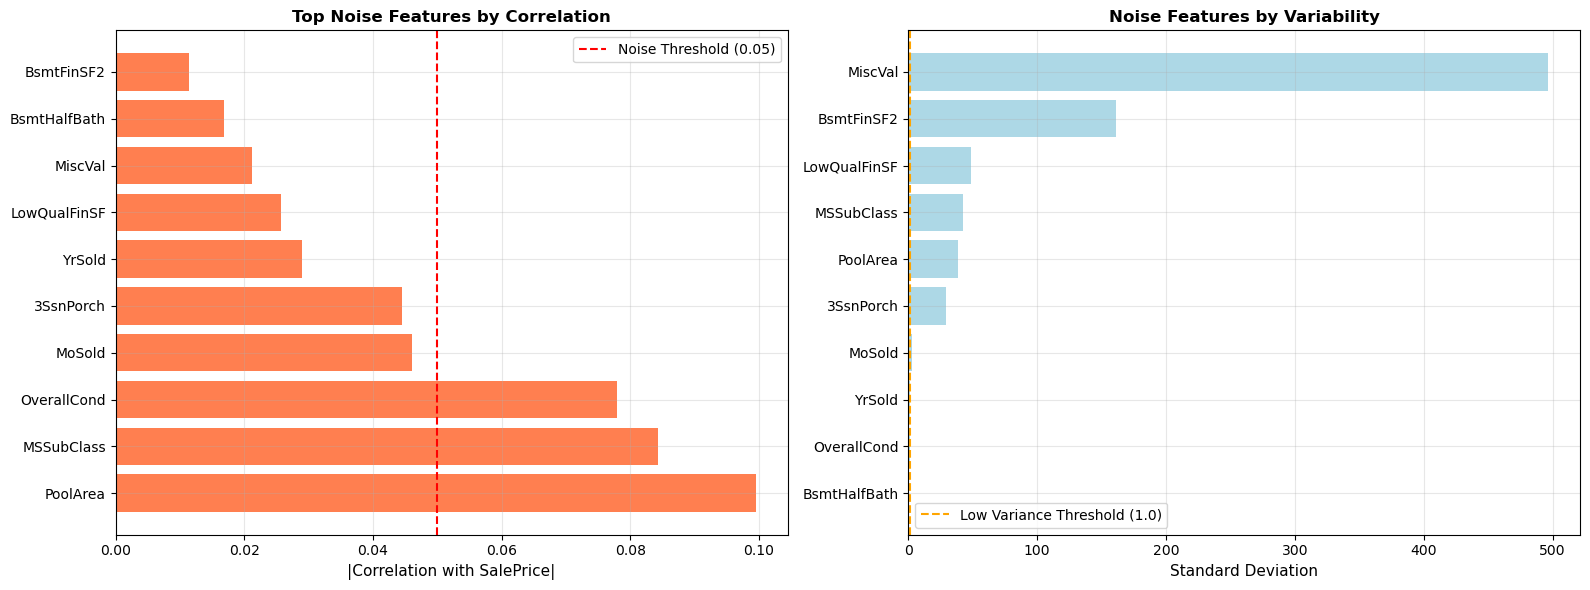

In [28]:
variance_analysis = pd.DataFrame({
    'Feature': numeric_df.columns,
    'Std': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Unique_Values': numeric_df.nunique()
})

variance_analysis = variance_analysis.sort_values('Std')
low_variance_features = variance_analysis[variance_analysis['Std'] < 1.0]


noise_summary = pd.DataFrame({
    'Feature': noise_features_sorted.index,
    'Correlation': noise_features_sorted.values,
    'Abs_Corr': abs(noise_features_sorted.values)
})

# Add variance info
noise_summary = noise_summary.merge(
    variance_analysis[['Feature', 'Std', 'Unique_Values']], 
    on='Feature', 
    how='left'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Correlation with SalePrice (Absolute Values)
top_noise = noise_summary.sort_values('Abs_Corr', ascending=False)
axes[0].barh(top_noise['Feature'], top_noise['Abs_Corr'], color='coral')
axes[0].axvline(x=0.05, color='red', linestyle='--', label='Noise Threshold (0.05)')
axes[0].set_xlabel('|Correlation with SalePrice|', fontsize=11)
axes[0].set_title('Top Noise Features by Correlation', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Standard Deviation
top_noise_std = noise_summary.sort_values('Std')
axes[1].barh(top_noise_std['Feature'], top_noise_std['Std'], color='lightblue')
axes[1].axvline(x=1.0, color='orange', linestyle='--', label='Low Variance Threshold (1.0)')
axes[1].set_xlabel('Standard Deviation', fontsize=11)
axes[1].set_title('Noise Features by Variability', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Perform variance analysis on all numerical features (eg. standard deviation, variance, and the number of unique values), and combine it with the results of weak correlation to more reliably identify truly noise features. Just having a low correlation with SalePrice is not sufficient to determine that a feature is useless because some variables may still have predictive value in non-linear models, introducing variance information can help identify those features that hardly change, which carry almost no useful information. By combining weakly correlated features with variance indicators and presenting both "correlation magnitude" and "standard deviation level" in a visual manner, it is possible to intuitively prove which features are almost unrelated to the target variable and lack sufficient numerical variation, thereby providing clear and interpretable basis for subsequent feature deletion. 

The outcome of this step is the ability to distinguish different levels of "weak features". ON the left, it identifies low-variance features with extremely small standard deviations and limited value variations. On the right, it further screens out those variables in weakly correlated features that simultaneously meet the criteria of "low correlation + low variance", which are the truly noise features that should be prioritized for deletion. This approach not only helps simplify the feature space, reduce the risk of overfitting, but also retains those features that have weak linear correlation but may contain non-linear information, providing a more robust foundation for subsequent modeling and model interpretation.

## 3.4 Trandorm Target Variable

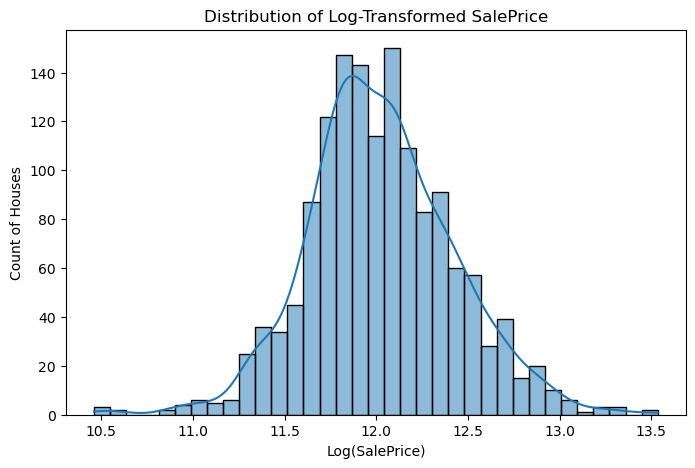

In [29]:
# target features, SalePrice
df['LogSalePrice'] = np.log(df['SalePrice'])

plt.figure(figsize=(8,5))
sns.histplot(df["LogSalePrice"], kde=True)
plt.title("Distribution of Log-Transformed SalePrice")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Count of Houses")
plt.show()

In [30]:
from scipy.stats import skew
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate skewness
skewness = df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewness.head(10))

# Transform features with skewness > 0.75
high_skew = skewness[abs(skewness) > 0.75]
print(f"\nFeatures with |skewness| > 0.75: {len(high_skew)}")

for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

print(f"Applied log transformation to {len(high_skew)} features")

MiscVal          24.434913
PoolArea         15.932532
LotArea          12.560986
3SsnPorch        10.286510
LowQualFinSF      8.995688
KitchenAbvGr      4.480268
BsmtFinSF2        4.247550
ScreenPorch       4.114690
BsmtHalfBath      4.095895
EnclosedPorch     3.083987
dtype: float64

Features with |skewness| > 0.75: 22
Applied log transformation to 22 features


The core purpose of performing logarithmic transformation is to alleviate the skewed distribution, compress the influence of extreme large values, and make the relationship between the features and SalePrice closer to linear, thereby better meeting the assumptions of linear models. 

If not processed, extreme large values would have an excessive influence on the regression line, resulting in skewed residual distribution, unstable variance, and the model being overly sensitive to a few large sample anomalies. Therefore, usually only features with skew > 0.75 undergo log1p transformation, which is used to only correct variables with relatively severe skewness, avoiding unnecessary distortion to features that are already relatively symmetrical and have a relatively linear relationship. 

For the target variable SalePrice, since its distribution is usually highly right-skewed, taking the logarithm of it can make the price distribution closer to normal, enabling the model to fit in relative scale, thereby improving R^2, improving residual diagnosis, and making the regression coefficients more interpretable. 

## 3.5 One-Hot Spotting

In [31]:
# One-Hot Encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

df = df_encoded

df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,0,1,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,0,1,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,0,1,0,0,0,1,0


The original data contains a large number of categorical features, such as Neighborhood and SaleCondition, and most machine learning models can only directly handle numerical inputs and cannot understand strings or labels. Therefore, One-Hot Encoding needs to be performed first. This method splits each category into several 0/1 indicator variables, enabling the model to learn the impact of "whether it belongs to a certain category", while avoiding mistakenly interpreting unordered categories as having numerical values or sequential relationships. 

If this step is skipped, the model will either directly report an error because it cannot handle non-numeric features, or learn false sequential relationships when using an incorrect encoding method, ultimately leading to a decrease in model performance or even distorted conclusions. Therefore, reasonable category encoding is a key step to ensure that the model correctly learns and reliably predicts.

# 4. Modelling

## 4.1 Train-Test Split

In [32]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df.drop(['SalePrice', 'LogSalePrice'], axis=1) 
y = df['LogSalePrice']  

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

# Standardize numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

Using the correctly cleaned target variable, Log SalePrice, and splits the dataset into training and testing sets by separating features (X) and the target (y). The data is then divided into X_train, X_test, y_train, and y_test, ensuring that model training and evaluation are performed on consistent, well-prepared inputs. This split allows the model to learn patterns from the training data while providing an unbiased assessment of performance on unseen test data. `test_size=0.2` indicates that 20% of the dataset is used as the test set and 80% as the training set. This is a common compromise ratio that ensures the model has sufficient data for learning while obtaining relatively stable evaluation results. The proportion that is too small will lead to unstable test results, while a proportion that is too large will weaken the model's learning ability. `random_state=42` is used to fix the random seed, ensuring that the data splitting results are consistent each time the program runs, making the experiment repeatable and facilitating the reproduction and comparison of results. `shuffle=True` means that the data order is randomly shuffled before splitting to avoid systematic bias introduced by the original data being sorted by time, number, or price, thus making the training set and test set closer to a truly random sampling distribution.



## 4.2 Model Comparison

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [34]:
# 1. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr  = lr.predict(X_test)

# Train metrics (log space)
train_r2_lr = r2_score(y_train, y_pred_train_lr)
train_rmse_log_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))

# Test metrics (log space)
test_r2_lr = r2_score(y_test, y_pred_test_lr)
test_rmse_log_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

# Print results
print("\nLinear Regression Performance (log SalePrice):")
print(f"  Train R² (log):   {train_r2_lr:.4f}")
print(f"  Test R² (log):    {test_r2_lr:.4f}")
print(f"  Train RMSE (log): {train_rmse_log_lr:.4f}")
print(f"  Test RMSE (log):  {test_rmse_log_lr:.4f}")
print(f"  R² Gap:           {train_r2_lr - test_r2_lr:.4f}")
print(f"  RMSE Gap:         {test_rmse_log_lr - train_rmse_log_lr:.4f}")


Linear Regression Performance (log SalePrice):
  Train R² (log):   0.9518
  Test R² (log):    0.8954
  Train RMSE (log): 0.0871
  Test RMSE (log):  0.1328
  R² Gap:           0.0564
  RMSE Gap:         0.0457


In [35]:
# 2. Ridge Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

# Predictions
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge  = ridge.predict(X_test)

# Train metrics (log)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
train_rmse_log_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))

# Test metrics (log)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
test_rmse_log_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print("\nRidge Regression Performance (log SalePrice):")
print(f"  Train R² (log):   {train_r2_ridge:.4f}")
print(f"  Test R² (log):    {test_r2_ridge:.4f}")
print(f"  Train RMSE (log): {train_rmse_log_ridge:.4f}")
print(f"  Test RMSE (log):  {test_rmse_log_ridge:.4f}")
print(f"  R² Gap:           {train_r2_ridge - test_r2_ridge:.4f}")
print(f"  RMSE Gap:         {test_rmse_log_ridge - train_rmse_log_ridge:.4f}")


Ridge Regression Performance (log SalePrice):
  Train R² (log):   0.9490
  Test R² (log):    0.9156
  Train RMSE (log): 0.0896
  Test RMSE (log):  0.1193
  R² Gap:           0.0334
  RMSE Gap:         0.0297


In [36]:
# Lasso
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

# Predictions
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso  = lasso.predict(X_test)

# Train metrics (log)
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
train_rmse_log_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))

# Test metrics (log)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)
test_rmse_log_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))

print("\nLasso Regression Performance (log SalePrice):")
print(f"  Train R² (log):   {train_r2_lasso:.4f}")
print(f"  Test R² (log):    {test_r2_lasso:.4f}")
print(f"  Train RMSE (log): {train_rmse_log_lasso:.4f}")
print(f"  Test RMSE (log):  {test_rmse_log_lasso:.4f}")
print(f"  R² Gap:           {train_r2_lasso - test_r2_lasso:.4f}")
print(f"  RMSE Gap:         {test_rmse_log_lasso - train_rmse_log_lasso:.4f}")
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


Lasso Regression Performance (log SalePrice):
  Train R² (log):   0.9300
  Test R² (log):    0.9149
  Train RMSE (log): 0.1050
  Test RMSE (log):  0.1198
  R² Gap:           0.0151
  RMSE Gap:         0.0148


In [37]:
# Decision Tree
dt = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt  = dt.predict(X_test)

# Train metrics (log space)
train_r2_dt = r2_score(y_train, y_pred_train_dt)
train_rmse_log_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))

# Test metrics (log space)
test_r2_dt = r2_score(y_test, y_pred_test_dt)
test_rmse_log_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

# Print results
print("\nDecision Tree Performance (log SalePrice):")
print(f"  Train R² (log):   {train_r2_dt:.4f}")
print(f"  Test R² (log):    {test_r2_dt:.4f}")
print(f"  Train RMSE (log): {train_rmse_log_dt:.4f}")
print(f"  Test RMSE (log):  {test_rmse_log_dt:.4f}")
print(f"  R² Gap:           {train_r2_dt - test_r2_dt:.4f}")
print(f"  RMSE Gap:         {test_rmse_log_dt - train_rmse_log_dt:.4f}")


Decision Tree Performance (log SalePrice):
  Train R² (log):   0.8415
  Test R² (log):    0.7595
  Train RMSE (log): 0.1579
  Test RMSE (log):  0.2013
  R² Gap:           0.0820
  RMSE Gap:         0.0434
